
# Práctica 3: Metaheurísticas basadas en poblaciones - Algoritmos Genéticos

<center><h3>
    Eloi Corral López
</h3></center>


## Instrucciones

Esto es **Jupyter Notebook**, un documento que integra código Python en un archivo Markdown.
Esto nos permite ir ejecutando celdas de código poco a poco, así como generar automáticamente un informe bien formateado de la práctica.

Puedes añadir una celda con el botón **"Insert"** de la barra de herramentas, y cambiar su tipo con **"Cell > Cell Type"**

Para ejecutar una celda de código, la seleccionaremos y pulsaremos el botón **"▶ Run"** de la barra de herramentas.
Para pasar el documento a HTML, seleccionaremos **"File > Download as > HTML (.html)"**

Sigue este guión hasta el final. Ejecuta el código proporcionado paso a paso comprendiendo lo que estás haciendo y reflexionando sobre los resultados. Habrá preguntas intercaladas a lo largo del guión, responde a todas ellas en la sección reservada para ese fin: **"Respuestas a los cuestionarios"**. Por favor, no modifiques ninguna linea de código excepto cuando se te pida explícitamente.

No olvides insertar tu **nombre y apellidos** en la celda superior.

IMPORTANTE: Escribe el código de tu o tus soluciones/respuestas en las celdas que se indican para ello. Además, a lo largo de la práctica se plantearán varias preguntas que debéis responder en la parte inferior del documento, incluyendo las celdas que veáis necesarias (si hacéis referencia a partes concretas de vuestro código, etc) para reponder a ellas.

## Entrega de la práctica

La fecha límite de entrega será la indicada en el Campus Virtual. La entrega consistirá de un único archivo comprimido con nombre `APELIDOS_NOME_Geneticos.zip` que contenga los seguientes ficheros:

 * `APELIDOS_NOME_Geneticos.html`: Archivo HTML fruto de la exportación del presente Notebook, con las preguntas respondidas al final del documento.
 * `APELIDOS_NOME_Geneticos.ipynb`: Archivo fuente Jupyter Notebook.
 * Archivo de datos de los problema utilizados en la resolución.


## Preliminares adicionales sobre Python


Para esta práctica, te sugerimos algunas funciones de paquetes que pueden resultarte útiles en la realización de esta práctica.

Has visto que cuando realizas laboratorios y pruebas para ajustar parámetros resulta necesario tener una estimación del tiempo invertido en la ejecución. Eso ayuda a valorar el balance del tiempo computacional frente a la inclusión de valores de parámetros en el laboratorio. En ese sentido, puede resultar conveniente añadir barras de progreso que además te permitan visualizar el progreso de resolución de las iteraciones. Para ese propósito podéis hacer uso del paquete `tqdm` (https://tqdm.github.io/). 

Puedes ver ejemplos en detalle descritos en https://towardsdatascience.com/progress-bars-for-python-with-tqdm-4dba0d4cb4c

Veámos un ejemplo ilustrativo aquí.

In [1]:
# solo debes importarlo una vez en el notebook.
# fíjate que estamos importando del paquete tqdm.notebook para que incorpore los decoradores compatibles en Jupyter 
# (en Python podrías importar simplemente desde el paquete tdqm)
from tqdm.notebook import trange, tqdm

`tqdm` permite añadir una barra de progreso que informe sobre el tiempo y el paso de iteraciones. En el ejemplo, la variable `nit` son el número de iteraciones a realizar y para conseguir que se visualize el progreso se pasa a `tqdm` un iterador de rango.

In [2]:
from random import randint

heads = 0
tails = 0
nit=1000000
for i in tqdm(range(nit), desc='Coin Flip Progress'):
    toss = randint(0, 1)
    if toss == 0:
        heads += 1
    else:
        tails += 1

Coin Flip Progress:   0%|          | 0/1000000 [00:00<?, ?it/s]

El paquete nos ofrece la posibilidad combinar `tdqm(range(NUM_IT))` en una única función, llamada `trange(NUM_IT)`. Veamos su funcionamiento en el siguiente ejemplo, que muestra también cómo podemos hacer cuando necesitamos llevar cuenta del progreso en bucles anidados.

In [5]:
num_games = 3

for game in trange(num_games, desc='Overall Progress'):
    heads = 0
    tails = 0
    nit=1000000
    for j in trange((nit), desc=f'Game {game+1} Progress'):
        toss = randint(0, 1)
        if toss == 0:
            heads += 1
        else:
            tails += 1
            
    print(f'Heads: {heads}, Tails: {tails}')


Overall Progress:   0%|          | 0/3 [00:00<?, ?it/s]

Game 1 Progress:   0%|          | 0/1000000 [00:00<?, ?it/s]

Heads: 499994, Tails: 500006


Game 2 Progress:   0%|          | 0/1000000 [00:00<?, ?it/s]

Heads: 501034, Tails: 498966


Game 3 Progress:   0%|          | 0/1000000 [00:00<?, ?it/s]

Heads: 499342, Tails: 500658


Aprovechamos para recordarte que puedes utilizar semillas en la generación de secuencias de números aleatorios para hacer determinista y más verificable tu implementación. 

In [1]:
import random
import time

In [7]:
# este vector será aleatorio si no habíamos establecido una semilla previamente.
# Podríamos tener incluso una semilla basada en el tiempo actual para forzar que se aleatorice 
# si ejecutamos esta celda múltiples veces
random.seed(time.time())

vector_aleatorio = [ random.randint(1, 10) for i in range(1,10) ]
print ("vector aleatorio ", vector_aleatorio)

# aquí establecemos una semilla totalmente fija
# que no depende del tiempo y por tanto está bajo nuestro control
semilla = 123456
random.seed (semilla)

# este viene determinado por la semilla
vector_aleatorio = [ random.randint(1, 10) for i in range(1,10) ]
print ("vector aleatorio ", vector_aleatorio)

# y ahora somos capaces de generar la misma serie "aleatoria"
random.seed (semilla)
vector_aleatorio = [ random.randint(1, 10) for i in range(1,10) ]
print ("vector aleatorio igual que el anterior", vector_aleatorio)


vector aleatorio  [9, 7, 3, 2, 9, 2, 8, 5, 6]
vector aleatorio  [5, 1, 3, 1, 2, 1, 5, 1, 2]
vector aleatorio igual que el anterior [5, 1, 3, 1, 2, 1, 5, 1, 2]


Esto puede ser útil para verificar que siempre obtienes los mismos resultados ante el mismo conjunto de entradas.

## El Problema del Viajante de Comercio (VC) con Algoritmos Genéticos

El objetivo de esta práctica es modelar e implementar un agente inteligente que sea capaz de resolver el problema del VC mediante la metaheurística (MH) de poblaciones conocida como Algoritmo Genético (GA, del inglés *Genetic  Algorithm*). Para ello, realizarás una implementación del algoritmo básico visto en la clase expositiva y valorarás si la introducción de modificaciones en el diseño del algoritmo te permite mejorar la calidad de las soluciones alcanzadas.


### Definición del problema de Viajante de Comercio (VC)


La definición del problema sigue la descripción ya vista en las prácticas anterior, en la que se disponía de una represetación del problema mediante un grafo ponderado. Así que, en primer lugar importa el módulo Python que acompaña esta práctica, que ya trae las funciones de apoyo como la clase `Localizaciones` que implementaba la carga de datos y que utilizaba una matriz de adyacencia.

In [2]:
from helpers_mod_ga import *

Si todo va bien, la primera distancia entre la ciudad 0 y 1 debe ser unos 55 km para el problema de las 8 ciudades gallegas.

In [3]:
g1=Localizaciones(filename='./data/grafo8cidades.txt')
print (g1.distancia(0,1))

55.88273580792048



## P3.1: Implementación básica de Algoritmo Genético



Implementa un algoritmo genético básico para resolver el problema del VC, siguiendo la descripción algorítmica de la MH vista en la clase expositiva.

Ten en cuenta las siguientes consideraciones de diseño para completar esta implementación básica:
- Representación  de  las  soluciones:  representación  de  orden  (permutaciones) comenzando y finalizando en la ciudad 0. 

- Población inicial: inicialización completamente aleatoria de la población inicial, que sean permutaciones válidas.

- Operador de cruce: Order Crossover (OX). La función/método que se encargue de hacer el cruce ordenado debe aceptar como parámetros la probabilidad de cruce (por defecto, establecida a pc=0.95), los dos puntos de corte así como los cromosomas sobre los que actuar.

- Operador de mutación: se utilizará el operador de intercambio, aplicado con una probabilidad de mutación. Vuestra implementación debe manejar dos variantes de esta función:
    - Mutación individual: solo se aplica la mutación, si procede, sobre un único gen en el cromosoma. La probabilidad de mutación por defecto se establece pm=0.25. Esta función debería aceptar el índice del gen sobre el que actuar además de la probabilidad de mutación y el cromosoma original.
    - Mutación cromosómica: se aplica la mutación contemplando todo el cromosoma, de forma que individualmente puede mutar cada gen de manera independiente según una probabilidad de mutación, establecida por defecto a pm=0.01.

- El reemplazo de la generación debe seguir un modelo de reemplazo generacional con elitismo. En particular, tu implementación debe disponer de dos variantes de la función de reemplazo:
    - mitades: haz que la mitad de la población resultante del reemplazo provenga de la generación actual mientras que la otra mitad provenga de los descendientes, tomando en ambos casos los mejores individuos. 
    - elitismo "elite=2": de esta forma, hay que mantener los 2 mejores individuos de la generación actual/ancestros; mientras que el resto provienen de entre los mejores hijos. La función de reemplazo debería parametrizar "elite".
    
Ambas variantes deben recibir como parámetro la lista de cromosomas de las poblaciones ascentros e hijos generados y retornar la población resultante.
    

- Condición de parada simple basado en un número de iteraciones máximo pasado como parámetro.

- La implementación debe ser completamente parametrizable, de forma que todos los componentes susceptibles de ser ajustados mediante parámetros deberían puedan ser establecidos en cada ejecución/problema.


Lanza varias ejecuciones para verificar que puede resolver el problema con los siguientes grafos de
ejemplo:
- grafo 8 ciudades gallegas (`data/grafo8cidades.txt`), con una población de 2 individuos y 150 iteraciones.
- grafo 120 ciudades estadounidenses (`data/US120.txt`), con una población de 32 individuos y 500 iteraciones.


Si no te convergiera, prueba a extender el número de iteraciones o variar parámetros como la probabilidad de mutación.



In [9]:
# Escribe aquí tu código para la función que implenta tu algoritmo genético
# Crea tantas celdas como consideres oportuno para escribir tu código
# Documenta siempre tu código con comentarios como este
import random
import time
from tqdm.notebook import trange, tqdm
from helpers_mod_ga import *

#Función que calcula el coste de una solución dada
def coste_solucion(S,g):
    coste=0
    #sumamos coste desde la de partida a la primera
    coste+=g.distancia(0,S[0])
    
    #recorremos la solución sumando costes
    for i in range (0, len(S)-1):
        coste+=g.distancia(S[i],S[i+1])
    
    #Sumamos distancia de la última a la de partida
    coste+=g.distancia(S[-1],0)
        
    return coste

# funcion de generacion de solucion inicial
def genera_solucion_inicial(g):
    
    #Generar vector, no se tiene en cuenta la ciudad de partida y de llegada (la 0) en el vector solución
    sol = [x for x in range (1,g.nciudades)]
    #Barajar
    random.shuffle(sol)
    
    return sol

# funcion de generacion de poblacion inicial
def genera_poblacion_inicial(g,cantidad):
    pobl=[]
    for i in range(cantidad):
        pobl.append(genera_solucion_inicial(g))
    return pobl

def cruzar(pto_corte_1,pto_corte_2,padres,pc=0.95):
    
    if(random.uniform(0,1)<pc):#probabilidad de cruce
        #Cruza
        
        #ordeno puntos de corte
        if(pto_corte_1<pto_corte_2):
            sep1=pto_corte_1
            sep2=pto_corte_2
        else:
            sep1=pto_corte_2
            sep2=pto_corte_1
        
        hijos=[]
        hijo1=[None]*len(padres[0])
        hijo2=[None]*len(padres[0])
        
        #copia inicial subconjunto do progenitor principal de cada un
        for i in range(sep1,sep2):
            hijo1[i]=padres[0][i]
            hijo2[i]=padres[1][i]
               
        
        cont1=sep2 #para recorrer hijo 1
        cont2=sep2 #para recorrer hijo 2
        cont3=sep2 #para recorrer padres secundarios
        for i in range(len(padres[0])):
            if(cont3==len(padres[0])):
                cont3=0
            #para hijo 1
            if padres[1][cont3] not in hijo1:
                
                #si chego ao final volvo ao inicio
                if(cont1==len(padres[0])):
                    cont1=0
                    
                hijo1[cont1]=padres[1][cont3]
                #incremento
                cont1+=1
                
                    
            #para hijo 2
            if padres[0][cont3] not in hijo2:
                #si chego ao final volvo ao inicio
                if(cont2==len(padres[0])):
                    cont2=0   
                
                hijo2[cont2]=padres[0][cont3]
                #incremento
                cont2+=1
            
            cont3+=1
        
        
        return hijo1,hijo2
        
    else:
        #non cruza
        return padres

def mutacion_individual(indgen,genotipo,pm=0.25):
    if(random.uniform(0,1)<pm):#probabilidad de mutar
        #para que mute generamos aleatoriamente outra posición do vector genotipo pola que se intercambiará,
        #isto asegura que siga sendo solución
        ind=random.randint(0,len(genotipo)-1)
        #repetimos mentras sexan o mismo índice para asegurarnos de que mute
        while(ind==indgen):
            ind=random.randint(0,len(genotipo)-1)
            
        temp=genotipo[indgen]
        genotipo[indgen]=genotipo[ind]
        genotipo[ind]=temp

def mutacion_cromosomica(genotipo,pm=0.01):
    for i in range(len(genotipo)):
        mutacion_individual(i,genotipo,pm)
        
def reemplazo_mitades(g,padres,hijos):
    padres=ordenar_por_coste(g,padres)
    hijos=ordenar_por_coste(g,hijos)
    
    mitad=len(padres)//2 #si o resultado é decimal se colle solo a parte enteira
    
    ngen=[]
    for i in range(mitad):
        ngen.append(padres[i][0])
        ngen.append(hijos[i][0])
    
    return ngen

def reemplazo_elitismo(g,padres,hijos,elite=2):
    
    padres=ordenar_por_coste(g,padres)
    hijos=ordenar_por_coste(g,hijos)
    
    ngen=[]
    
    for i in range(elite):
        ngen.append(padres[i][0])
    for i in range(len(padres)-elite):
        ngen.append(hijos[i][0])
    
    return ngen


def ordenar_por_coste(g,v):
    
    vect=[(genotipo,coste_solucion(genotipo,g)) for genotipo in v]
    vect.sort(key=lambda x: x[1])
    return vect


def hacer_parejas_seleccion(g,pobl):
    ordenado=ordenar_por_coste(g,pobl)
    parejas=[]
    
    for i in range(0,len(ordenado),2):
        parejas.append([ordenado[i][0],ordenado[i+1][0]])

    return parejas

def cruzar_poblacion(g,pobl):
    parejas=hacer_parejas_seleccion(g,pobl)
    

    
    hijos=[]
    
    for i in range(len(parejas)):
        #Generamos ptos de corte diferentes para cada cruce
        pto_corte_1=random.randint(0,len(pobl[0])-1)
        pto_corte_2=random.randint(0,len(pobl[0])-1)

        while (pto_corte_2==pto_corte_1):
            pto_corte_2=random.randint(0,len(pobl[0])-1)
        
        #cruzamos
        h1,h2=cruzar(pto_corte_1,pto_corte_2,parejas[i],0.95)
        hijos.append(h1)
        hijos.append(h2)
    
    return hijos
    




def alg_genetico(g,numpob,it=100,algoritmo_mutacion="i",pm=0.25,tipo_reemplazo="m",elite=2):
    pob=genera_poblacion_inicial(g,numpob)
    topsoluciones=[]
    for i in range(it):
        hijos=[]
        for h in cruzar_poblacion(g,pob):

            if(algoritmo_mutacion=="i"):
                ind=random.randint(0,len(h)-1)
                mutacion_individual(ind,h,pm)
            else:
                mutacion_cromosomica(h,pm)

            hijos.append(h)
        

        
        if(tipo_reemplazo=="m"):
            pob=reemplazo_mitades(g,pob,hijos)
        else:
            pob=reemplazo_elitismo(g,pob,hijos,elite)
        

        topsoluciones.append(ordenar_por_coste(g,pob)[0])

    return topsoluciones
print("--------------------")
g2=Localizaciones(filename='./data/US120.txt')
sols=alg_genetico(g2,32,500,"i",0.25,"a",3)
#print(sols)
print("======================")
sols.sort(key=lambda x: x[1])
print(sols[0])


#se siguió un mecanismo de selección de orden lineal con probabilidad 1    74|52|61|38



--------------------
([1, 30, 39, 34, 60, 74, 58, 63, 99, 61, 4, 36, 35, 64, 84, 83, 71, 42, 41, 26, 47, 70, 116, 6, 102, 29, 72, 112, 95, 87, 12, 9, 17, 27, 65, 118, 115, 40, 91, 14, 2, 38, 8, 82, 62, 21, 80, 114, 22, 89, 32, 43, 16, 59, 105, 101, 51, 79, 56, 73, 49, 75, 117, 24, 55, 11, 113, 37, 50, 18, 66, 3, 28, 52, 92, 23, 33, 46, 54, 110, 69, 13, 78, 107, 10, 53, 67, 48, 85, 104, 108, 20, 88, 96, 31, 5, 106, 19, 103, 25, 111, 15, 97, 57, 44, 45, 76, 109, 119, 86, 93, 7, 98, 94, 100, 90, 68, 77, 81], 79113.94036964285)


In [7]:
ejecucion_pruebas(g2,32,500,"i",0.25,"m")

77554.88011738827

In [20]:
a=[1, 4, 3, 9, 5, 7, 6, 8, 2]
random.seed(8933)
mutacion_cromosomica(a,0.11)
print(a)

[6, 4, 3, 9, 5, 7, 1, 8, 2]


In [21]:
padres=[[4, 2, 6, 7, 5, 3, 1], [1, 4, 2, 7, 3, 6, 5], [7, 1, 3, 4, 6, 5, 2], [6, 2, 7, 1, 5, 3, 4], [7, 6, 4, 5, 1, 2, 3], [7, 6, 1, 5, 2, 4, 3], [4, 6, 1, 5, 2, 3, 7], [4, 3, 2, 7, 1, 5, 6], [1, 4, 5, 3, 7, 2, 6], [7, 6, 4, 3, 2, 5, 1]]
hijos=[[4, 1, 6, 7, 2, 5, 3], [2, 4, 7, 1, 5, 3, 6], [3, 7, 1, 4, 2, 5, 6], [3, 7, 6, 1, 5, 2, 4], [3, 5, 2, 6, 7, 1, 4], [7, 4, 5, 3, 2, 6, 1], [6, 3, 7, 1, 4, 2, 5], [7, 3, 2, 5, 4, 1, 6], [2, 7, 1, 6, 5, 3, 4], [1, 4, 6, 5, 2, 7, 3]]
n=reemplazo_elitismo(g1,padres,hijos,2)
print(n)
print()
n2=ordenar_por_coste(g1,n)
print(n2)

print()

n3=[i[0] for i in n2]
print(n3)




[[7, 6, 4, 5, 1, 2, 3], [7, 6, 4, 3, 2, 5, 1], [7, 4, 5, 3, 2, 6, 1], [7, 3, 2, 5, 4, 1, 6], [2, 7, 1, 6, 5, 3, 4], [3, 5, 2, 6, 7, 1, 4], [3, 7, 6, 1, 5, 2, 4], [3, 7, 1, 4, 2, 5, 6], [4, 1, 6, 7, 2, 5, 3], [1, 4, 6, 5, 2, 7, 3]]

[([7, 6, 4, 5, 1, 2, 3], 508.2174604048628), ([7, 6, 4, 3, 2, 5, 1], 551.0895199274364), ([7, 4, 5, 3, 2, 6, 1], 621.6318127974241), ([7, 3, 2, 5, 4, 1, 6], 657.7947530262034), ([2, 7, 1, 6, 5, 3, 4], 741.643573624067), ([3, 5, 2, 6, 7, 1, 4], 755.2093059090055), ([3, 7, 6, 1, 5, 2, 4], 755.3702042518474), ([3, 7, 1, 4, 2, 5, 6], 756.2121160596964), ([4, 1, 6, 7, 2, 5, 3], 757.1412763476841), ([1, 4, 6, 5, 2, 7, 3], 772.5355065412211)]

[[7, 6, 4, 5, 1, 2, 3], [7, 6, 4, 3, 2, 5, 1], [7, 4, 5, 3, 2, 6, 1], [7, 3, 2, 5, 4, 1, 6], [2, 7, 1, 6, 5, 3, 4], [3, 5, 2, 6, 7, 1, 4], [3, 7, 6, 1, 5, 2, 4], [3, 7, 1, 4, 2, 5, 6], [4, 1, 6, 7, 2, 5, 3], [1, 4, 6, 5, 2, 7, 3]]


In [22]:
padres=[[2, 5, 8, 9, 1, 6, 3, 4, 7],[6, 8, 4, 1, 5, 9, 2, 3, 7]]
random.seed(8974) 
r=cruzar(4,8,padres,0.95)
print(r)

([8, 5, 9, 2, 1, 6, 3, 4, 7], [8, 1, 6, 4, 5, 9, 2, 3, 7])


In [23]:
padres=[[6, 5, 3, 7, 4, 1, 2], [6, 3, 2, 7, 1, 4, 5], [3, 5, 7, 1, 2, 6, 4], [2, 5, 6, 7, 1, 3, 4], [7, 5, 6, 4, 2, 3, 1], [5, 2, 7, 1, 4, 6, 3], [6, 3, 4, 2, 1, 5, 7], [7, 3, 1, 2, 4, 5, 6], [4, 5, 1, 7, 3, 6, 2], [6, 1, 5, 3, 2, 7, 4]]

hijos=[[6, 1, 5, 4, 7, 3, 2], [2, 1, 6, 4, 5, 7, 3], [4, 1, 7, 3, 5, 6, 2], [7, 6, 5, 2, 3, 4, 1], [7, 2, 1, 6, 5, 3, 4], [2, 3, 5, 4, 1, 6, 7], [2, 7, 6, 5, 3, 4, 1], [1, 4, 5, 3, 2, 6, 7], [1, 5, 7, 4, 3, 2, 6], [2, 6, 7, 1, 4, 5, 3]]

n=reemplazo_mitades(g1,padres,hijos)
print(n)
print()

n2=ordenar_por_coste(g1,n)
print(n2)

print()

n3=[i[0] for i in n2]
print(n3)

[[7, 5, 6, 4, 2, 3, 1], [7, 6, 5, 2, 3, 4, 1], [7, 3, 1, 2, 4, 5, 6], [1, 4, 5, 3, 2, 6, 7], [2, 5, 6, 7, 1, 3, 4], [2, 3, 5, 4, 1, 6, 7], [6, 3, 4, 2, 1, 5, 7], [2, 7, 6, 5, 3, 4, 1], [6, 5, 3, 7, 4, 1, 2], [1, 5, 7, 4, 3, 2, 6]]

[([7, 6, 5, 2, 3, 4, 1], 514.6389167447405), ([1, 4, 5, 3, 2, 6, 7], 540.7215334565252), ([7, 5, 6, 4, 2, 3, 1], 545.6183472436542), ([2, 3, 5, 4, 1, 6, 7], 552.9273036235754), ([7, 3, 1, 2, 4, 5, 6], 564.3854303471886), ([2, 7, 6, 5, 3, 4, 1], 610.4356644478219), ([2, 5, 6, 7, 1, 3, 4], 618.8282425306211), ([6, 3, 4, 2, 1, 5, 7], 640.6474742669596), ([1, 5, 7, 4, 3, 2, 6], 644.0425299170149), ([6, 5, 3, 7, 4, 1, 2], 687.8808809499526)]

[[7, 6, 5, 2, 3, 4, 1], [1, 4, 5, 3, 2, 6, 7], [7, 5, 6, 4, 2, 3, 1], [2, 3, 5, 4, 1, 6, 7], [7, 3, 1, 2, 4, 5, 6], [2, 7, 6, 5, 3, 4, 1], [2, 5, 6, 7, 1, 3, 4], [6, 3, 4, 2, 1, 5, 7], [1, 5, 7, 4, 3, 2, 6], [6, 5, 3, 7, 4, 1, 2]]


In [24]:
a=[4, 3, 1, 9, 8, 5, 2, 6, 7]
random.seed(2495)
mutacion_individual(0,a,0.75)
print(a)

[3, 4, 1, 9, 8, 5, 2, 6, 7]


In [5]:
def ejecucion_pruebas(g,t,i,m,p,r,e=1):
    solucions=alg_genetico(g,t,i,m,p,r,e)
    solucions.sort(key=lambda x: x[1])
    return solucions[0][1]

❓ **Pregunta 1**. Explica brevemente los detalles relevantes de tu código para entender tu implementación (p.ej., estructura de tu código, funciones, implementación de operadores, etc.). ¿Cuál es el mecanismo de selección escogido para tu implementación? Explica también cómo has verificado tu implementación.

A continuación se presentan las funciones del código:

-coste_solucion: calcula el coste de una solución dada a partir del objeto localizaciones

-genera_solucion_inicial: genera una solución inicial de forma aleatoria

-genera_poblacion_inicial: genera tantas soluciones iniciales como el tamaño de la población

-cruzar: dados dos ptos de corte, dos padres y la probabilidad de cruce, si se dá el cruce crea dos hijos siguiendo el algoritmo OX, si no devuelve los padres.

-mutacion_individual: dado el indice del elemento a mutar, el genotipo y la probabilidad, muta el elemento si se da la probabilidad utilizando el OPERADOR DE INTERCAMBIO (que intercambia el elemento en la posición del índice por uno aleatorio del genotipo que no sea el mismo.

-mutacion_cromosomica: si utiliza la mutacion individual para cada elemento del genotipo

-reemplazo_mitades: crea la nueva generación tomando la mitad de los mejores padres y la mitad de los mejores hijos

-reemplazo_elitismo: crea la nueva generación con tantos padres como el número pasado por parámetro y el resto los mejores hijos

-ordenar_por_coste: función que ordena un conjunto de soluciones por su coste

-hacer_parejas_seleccion: recibe un conjunto de soluciones y las empareja siguiendo el MECANISMO DE SELECCIÓN LINEAL CON PROBABILIDAD 1, es decir, las parejas serán (tras ordenar las soluciones) primero con segundo, segundo con tercero y así sucesivamente

-cruzar_poblacion: recibe una poblacion, crea parejas con la función anterior, genera ptos de corte diferentes para el cruce e invoca a la funcion de cruce, devuelve el conjunto de los hijos.

-alg_genetico: función que implementa el algoritmo genético, recibe el grafo, el tamaño de la pblacion inicial, las iteraciones, los algoritmos de mutacion y reemplazo a usar, la probabilidad de mutacion y de ser necesario el valor de elitismo. Devuelve el conjunto de las mejores soluciones de cada generación.

Para verificar la implementación se fueron ejecutando las diferentes funciones con valores conocidos como parámetros y comprobando que la salida era la esperada.

## P3.2: Laboratorio

Como toda metaheurística, resulta crucial conocer cómo afecta en términos prácticos los parámetros
del algoritmo y los operadores desarrollados. Estudia el comportamiento del algoritmo implementado para resolver VC atendiendo a las siguientes cuestiones.


❓ **Pregunta 2**. Realiza el estudio de la calidad de la solución variando el tamaño de la población: 1, 2, 4, 8, 16, 32, 64... ¿Qué valor recomendarías para el problema de las 120 ciudades? ¿Por qué? Ten en cuenta que tienes dos variantes del mecanismo de reemplazo.

❓ **Pregunta 3**. Ahora realiza un estudio similar variando la probabilidad de mutación en el rango 0, ..., 0.95 en pasos de 0.05~0.10. ¿Qué valor recomendarías para este parámetro? ¿Por qué? Ten en cuenta que tienes dos variantes del mecanismo de mutación.

❓ **Pregunta 4**. Finalmente realiza un estudio variando el número de iteraciones máximas en el rango de 50 a 1000, considerando un paso variable o adaptativo a conveniencia. ¿Qué valor recomendarías para este parámetro? ¿Por qué? Realiza una discusión reflexionando sobre los resultados conjuntos de estos tres parámetros. 

Apoya todas tus respuestas en datos-gráficos resultantes de tus estudios.

Importante: además de la calidad de la soluciones obtenidas, se recomienda medir tiempos para tomar medidas operativas sobre el número de repeticiones que permitan realizar promedios (se recomienda no más de 10 si se ralentiza mucho) y prescindir de manera razonada de valores en las series de ejecución que no sean computacionalmente rentables/viables con tu implementación/ordenador (p.ej., tamaños de población elevados pueden tomar mucho tiempo para resolver).






In [4]:
#Función que selecciona la mejor solución del conjunto de mejores soluciones recorridas que devuelve el algoritmo
def ejecucion_pruebas(g,t,i,m,p,r,e=1):
    solucions=alg_genetico(g,t,i,m,p,r,e)
    solucions.sort(key=lambda x: x[1])
    return solucions[0][1]
    

### Pregunta 2 - Tamaños

En este apartado se tratará de estudiar como afecta el tamaño de la población a las soluciones obtenidas. Para ello se probarán con tamaños múltiplos de 2, en concreto 2,4,8,16,32 y 64. Podría ser interesante probar tamaños más grandes, pero para no demorar en exceso las pruebas únicamente se llegará a 64. Para la realización de las pruebas se tuvo en cuenta los diferentes métodos de reemplazo. De esta forma se realizan pruebas en cada tamaño para el reemplazo por mitades, para el reemplazo con un elitismo del 25% de la generación anterior, con un 10% y por último con un único miembro de la generación anterior.

Además, se fijaron otros parámetros con el objeto de limitar las combinaciones posibles, ya que de lo contrario las pruebas serían inabarcables. En concreto se fijaron las iteraciones a 500 y el algoritmo de mutación al individual con una probabilidad de 0.25.

A continuación se muestra el código y los resultados obtenidos, los cuales serán discutidos tras dicha celda.

<IPython.core.display.Javascript object>


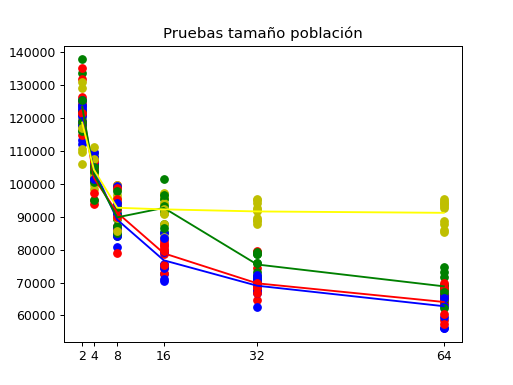

  0%|          | 0/6 [00:00<?, ?it/s]

TAMAÑO: 2


  0%|          | 0/10 [00:00<?, ?it/s]

TAMAÑO: 4


  0%|          | 0/10 [00:00<?, ?it/s]

TAMAÑO: 8


  0%|          | 0/10 [00:00<?, ?it/s]

TAMAÑO: 16


  0%|          | 0/10 [00:00<?, ?it/s]

TAMAÑO: 32


  0%|          | 0/10 [00:00<?, ?it/s]

TAMAÑO: 64


  0%|          | 0/10 [00:00<?, ?it/s]

=====TAMAÑO  2 =====

MEDIAS:
Media coste mitades: 119893.71713367965
Media coste elitismo 25%: 123282.69378798896
Media coste elitismo 10%: 123300.54612286773
Media coste elitismo 1: 118503.63388896368

DESVIACIÓN TÍPICA:
Desviación típica mitades 4474.810168206805
Desviación típica elitismo 25%: 6270.84792357637
Desviación típica 10%: 7375.153971798839
Desviación típica 1: 8121.810439593908

TIEMPOS:
Media tiempo mitades: 0.2706956148147583
Media tiempo elitismo 25%: 0.2649428367614746
Media tiempo elitismo 10%: 0.2660430669784546
Media tiempo elitismo 1: 0.26371045112609864

=====TAMAÑO  4 =====

MEDIAS:
Media coste mitades: 104437.1798425274
Media coste elitismo 25%: 101700.76233791657
Media coste elitismo 10%: 102929.81844071235
Media coste elitismo 1: 104231.44548620508

DESVIACIÓN TÍPICA:
Desviación típica mitades 3478.9955678061433
Desviación típica elitismo 25%: 4630.8236786356465
Desviación típica 10%: 3704.12892007014
Desviación típica 1: 3910.769012862209

TIEMPOS:
Media ti

In [6]:
# puedes añadir aquí la implementación o cualquier código que necesites para responder las preguntas
# utiliza tantas celdas como necesites




%matplotlib notebook

import matplotlib.pyplot as plt 
import statistics

#numero de pruebas
NUMPRUEBAS=10


g2=Localizaciones(filename='./data/US120.txt')



tamanhos=[2**i for i in range(1,7)]

#creamos figura y ejes
fig = plt.figure()
ax = fig.add_subplot(111, projection='rectilinear')
ax.set_title("Pruebas tamaño población")
ax.set_xticks(tamanhos)

#listas para almacenar los resultados
resultados_rmitades=[]
resultados_relitismo1=[]
resultados_relitismo2=[]
resultados_relitismo3=[]
#listas para almacenar las medias y poder imprimirlas como líneas luego
medias_rmitades=[]
medias_relitismo1=[]
medias_relitismo2=[]
medias_relitismo3=[]

for t in tqdm(tamanhos):
    print("TAMAÑO:",t)
    
    #Resultados y tiempos parciales
    rpm=[]
    rpe1=[]
    rpe2=[]
    rpe3=[]
    tm=[]
    te1=[]
    te2=[]
    te3=[]
    for i in tqdm(range(NUMPRUEBAS)):
        #Mitades
        inicio=time.time()
        rpm.append(ejecucion_pruebas(g2,t,500,"i",0.25,"m"))
        final=time.time()
        tm.append(final-inicio)
        
        #Elitismo 1 --- 25%
        if(t==2):#primer valor
            inicio=time.time()
            rpe1.append(ejecucion_pruebas(g2,t,500,"i",0.25,"e",1))
        else:#>=4 implica multiplicar por 0.25 para coger el 25%
            inicio=time.time()
            rpe1.append(ejecucion_pruebas(g2,t,500,"i",0.25,"e",int(0.25*t)))
        final=time.time()
        te1.append(final-inicio)
        
        #Elitismo 2 --- 10%
        if(t==2 or t==4 or t==8):
            inicio=time.time()
            rpe2.append(ejecucion_pruebas(g2,t,500,"i",0.25,"e",1))
        else:
            inicio=time.time()
            rpe2.append(ejecucion_pruebas(g2,t,500,"i",0.25,"e",int(0.1*t)))
        final=time.time()
        te2.append(final-inicio)
        
        #Elitismo 3 --- uno
        inicio=time.time()
        rpe3.append(ejecucion_pruebas(g2,t,500,"i",0.25,"e",1))
        final=time.time()
        te3.append(final-inicio)
    
    #Guardamos resultados
    resultados_rmitades.append([t,rpm,tm])
    resultados_relitismo1.append([t,rpe1,te1])
    resultados_relitismo2.append([t,rpe2,te2])
    resultados_relitismo3.append([t,rpe3,te3])

#recorremos los resultados imprimiendo cada uno como un punto en la gráfica, asignándole un color
#según el algoritmo
for i in range(len(tamanhos)):
    
    for j in range(NUMPRUEBAS):
        ax.plot(tamanhos[i],resultados_rmitades[i][1][j], "bo")
        ax.plot(tamanhos[i],resultados_relitismo1[i][1][j], "ro")
        ax.plot(tamanhos[i],resultados_relitismo2[i][1][j], "go")
        ax.plot(tamanhos[i],resultados_relitismo3[i][1][j], "yo")
    
    #guardamos las medias para las líneas de la gráfica
    medias_rmitades.append(statistics.mean(resultados_rmitades[i][1]))
    medias_relitismo1.append(statistics.mean(resultados_relitismo1[i][1]))
    medias_relitismo2.append(statistics.mean(resultados_relitismo2[i][1]))
    medias_relitismo3.append(statistics.mean(resultados_relitismo3[i][1]))
     
    #Impresión de valores
    print("=====TAMAÑO ",tamanhos[i],"=====")
    print()
    print("MEDIAS:")
    print("Media coste mitades:",statistics.mean(resultados_rmitades[i][1]))
    print("Media coste elitismo 25%:",statistics.mean(resultados_relitismo1[i][1]))
    print("Media coste elitismo 10%:",statistics.mean(resultados_relitismo2[i][1]))
    print("Media coste elitismo 1:",statistics.mean(resultados_relitismo3[i][1])) 
    print()
    
    print("DESVIACIÓN TÍPICA:")
    print("Desviación típica mitades",statistics.stdev(resultados_rmitades[i][1]))
    print("Desviación típica elitismo 25%:",statistics.stdev(resultados_relitismo1[i][1]))
    print("Desviación típica 10%:",statistics.stdev(resultados_relitismo2[i][1]))
    print("Desviación típica 1:",statistics.stdev(resultados_relitismo3[i][1])) 
    print()
        
        
    print("TIEMPOS:")
    print("Media tiempo mitades:",statistics.mean(resultados_rmitades[i][2]))
    print("Media tiempo elitismo 25%:",statistics.mean(resultados_relitismo1[i][2]))
    print("Media tiempo elitismo 10%:",statistics.mean(resultados_relitismo2[i][2]))
    print("Media tiempo elitismo 1:",statistics.mean(resultados_relitismo3[i][2])) 
    print()
        

print()
#Impresión de las líneas de las medias
plt.plot(tamanhos,medias_rmitades,color='blue') 
plt.plot(tamanhos,medias_relitismo1,color='red') 
plt.plot(tamanhos,medias_relitismo2,color='green') 
plt.plot(tamanhos,medias_relitismo3,color='yellow') 
plt.show()




#### Resultados

Azul---Mitades    
Rojo---Elitismo 25%    
Verde---Elitismo 10%    
Amarillo---Elitismo 1    

Observando la gráfica anterior se pueden extraer varias conclusiones. Probablemente la más evidente es que tomar una única solución de las antiguas en el reemplazo (elitismo=1) no resulta una buena práctica. El hecho de tomar únicamente uno provoca que se deshechen una gran cantidad de buenas soluciones, empeorando el rendimiento del algoritmo. En la gráfica se observa que este se estanca entorno a los 92k, muy lejano a los otros 3. 

Por otra parte se observa que, pese a que tomando un 10% se evita el estancamiento en el que caía el anterior a partir del tamaño 8-16, existe cierta diferencia (entorno a 5k) con las otras dos configuraciones.

En cuanto a las otras dos configuraciones (mitades y elitismo 25%) se observa un rendimiento muy similar para la mayoría de tamaños, siendo las mayores diferencias entorno a 2k, siendo el reemplazo por mitades ligeramente mejor.

Si se analizan los tiempos, se observa que para el tamaño 64 el tiempo supera los 9s para todas las variantes. Con tamaño 32 el tiempo se reduce a la mitad (entorno a 4.6s), mientras que el coste en la mejor configuración (mitades), empeora en 6208. Para el tamaño 16 el tiempo se reduce de nuevo a la mitad (entorno a 2.3s), mientras que el coste empeora con respecto a la de 32 en 7700. Para tamaño 8, 1.3s y 12326 de empeoramiento.

En consecuencia se tomará como un buen valor para el tamaño el 32. Este ofrece un buen coste y, pese a que el 64 bajaría en 6208 el coste, el incremento en tiempo (4.6s) comienzaría a ser considerable a la hora de realizar múltiples ejecuciones.

Se tendrá en cuenta lo deducido en este apartado para la realización de los siguientes, por lo que se fijará el algoritmo de reemplazo de mitades y el tamaño 32.


Para todos los apartados el número de pruebas por valor es de 10.


### Pregunta 3 - Probabilidad de mutación
En este apartado se tratará de estudiar como afectan los diferentes valores de la probabilidad de mutación en las soluciones obtenidas. Se tomarán como valores 0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9 y 0.95. Para la realización de las pruebas se tuvo en cuenta los dos métodos de mutación disponibles, individual y de todo el genoma. Se recogerán e ilustrarán los datos para ambas.

Se utilizará lo deducido del apartado anterior para fijar el valor de tamaño a 32 y el algoritmo de reemplazo al de mitades. Además se fijará el número de iteraciones a 500.

A continuación se muestra el código y los resultados. Tras esa celda se discutirán dichos resultados.

<IPython.core.display.Javascript object>


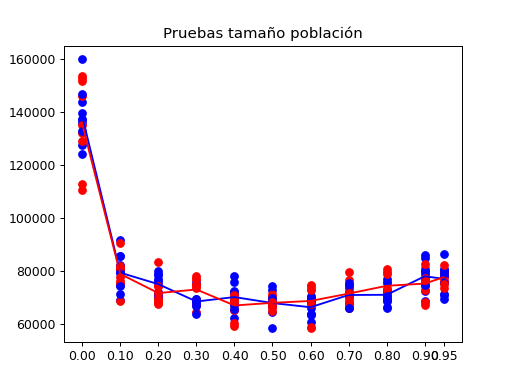

  0%|          | 0/11 [00:00<?, ?it/s]

PROBABILIDAD: 0.0


  0%|          | 0/10 [00:00<?, ?it/s]

PROBABILIDAD: 0.1


  0%|          | 0/10 [00:00<?, ?it/s]

PROBABILIDAD: 0.2


  0%|          | 0/10 [00:00<?, ?it/s]

PROBABILIDAD: 0.3


  0%|          | 0/10 [00:00<?, ?it/s]

PROBABILIDAD: 0.4


  0%|          | 0/10 [00:00<?, ?it/s]

PROBABILIDAD: 0.5


  0%|          | 0/10 [00:00<?, ?it/s]

PROBABILIDAD: 0.6


  0%|          | 0/10 [00:00<?, ?it/s]

PROBABILIDAD: 0.7


  0%|          | 0/10 [00:00<?, ?it/s]

PROBABILIDAD: 0.8


  0%|          | 0/10 [00:00<?, ?it/s]

PROBABILIDAD: 0.9


  0%|          | 0/10 [00:00<?, ?it/s]

PROBABILIDAD: 0.95


  0%|          | 0/10 [00:00<?, ?it/s]



=====PROBABILIDAD  0.0 =====

MEDIAS:
Media coste mutación individual: 138520.13891678266
Media coste mutación genoma: 135631.04299613799

DESVIACIÓN TÍPICA:
Desviación típica mutación individual 10183.012339189318
Desviación típica mutación genoma: 15699.88515293925

TIEMPOS:
Media tiempo mutación individual: 4.205493330955505
Media tiempo mutación genoma: 4.238275504112243



=====PROBABILIDAD  0.1 =====

MEDIAS:
Media coste mutación individual: 79325.98819455845
Media coste mutación genoma: 78857.44259966831

DESVIACIÓN TÍPICA:
Desviación típica mutación individual 7088.053700262714
Desviación típica mutación genoma: 5755.07883904169

TIEMPOS:
Media tiempo mutación individual: 4.675099563598633
Media tiempo mutación genoma: 4.580444765090943



=====PROBABILIDAD  0.2 =====

MEDIAS:
Media coste mutación individual: 75001.39417516846
Media coste mutación genoma: 71618.39337122832

DESVIACIÓN TÍPICA:
Desviación típica mutación individual 3630.148523636591
Desviación típica mutación g

In [17]:

%matplotlib notebook

import matplotlib.pyplot as plt 
import statistics


NUMPRUEBAS=10


g2=Localizaciones(filename='./data/US120.txt')


#probabilidades
probabilidades=[round(i*0.1,2) for i in range(10)]
probabilidades.append(0.95)

#creo figura y ejes
fig = plt.figure()
ax = fig.add_subplot(111, projection='rectilinear')
ax.set_title("Pruebas tamaño población")
ax.set_xticks(probabilidades)

#almacenar resultados y medias
resultados_indv=[]
resultados_gen=[]
medias_indv=[]
medias_gen=[]

for m in tqdm(probabilidades):
    print("PROBABILIDAD:",m)
    
    #resultados y tiempos parciales
    rindv=[]
    rgen=[]
    tindv=[]
    tgen=[]
    for i in tqdm(range(NUMPRUEBAS)):
 
        #Mutación individual
        inicio=time.time()
        rindv.append(ejecucion_pruebas(g2,32,500,"i",m,"m"))
        final=time.time()
        tindv.append(final-inicio)
        #Mutación genoma
        inicio=time.time()
        rgen.append(ejecucion_pruebas(g2,32,500,"i",m,"m"))
        final=time.time()
        tgen.append(final-inicio)
    
    #almaceno resultados
    resultados_indv.append([m,rindv,tindv])
    resultados_gen.append([m,rgen,tgen])
        
for i in range(len(probabilidades)):
    #imprimo puntos
    for j in range(NUMPRUEBAS):
        ax.plot(probabilidades[i],resultados_indv[i][1][j], "bo")
        ax.plot(probabilidades[i],resultados_gen[i][1][j], "ro")
    #gardo medias
    medias_indv.append(statistics.mean(resultados_indv[i][1]))
    medias_gen.append(statistics.mean(resultados_gen[i][1]))
    
    print()
    print()
    #Impresión                    
    print("=====PROBABILIDAD ",probabilidades[i],"=====")
    print()
    print("MEDIAS:")
    print("Media coste mutación individual:",statistics.mean(resultados_indv[i][1]))
    print("Media coste mutación genoma:",statistics.mean(resultados_gen[i][1]))
    print()
    
    print("DESVIACIÓN TÍPICA:")
    print("Desviación típica mutación individual",statistics.stdev(resultados_indv[i][1]))
    print("Desviación típica mutación genoma:",statistics.stdev(resultados_gen[i][1]))
    print()
        
        
    print("TIEMPOS:")
    print("Media tiempo mutación individual:",statistics.mean(resultados_indv[i][2]))
    print("Media tiempo mutación genoma:",statistics.mean(resultados_gen[i][2]))
    print()
        

print()
#líneas media
plt.plot(probabilidades,medias_indv,color='blue') 
plt.plot(probabilidades,medias_gen,color='red') 
plt.show()

#### Resultados
Azul --- Mutación individual
Rojo --- Mutación genoma

El primer hecho evidente en esta gráfica es la importancia de la mutación en el algoritmo, ya que cuando esta se incrementa un mínimo, el coste ya mejora entorno a unos 56k. Esto es debido a que la variabilidad introducida por la mutación es indispensable para la evolución de las soluciones, no bastando únicamente con el cruce que mezcle los genomas de sus padres. El siguiente hecho observable es que las líneas de las medias asemejan seguir un patrón en cierto modo parabólico, obteniendo los resultados con menor coste medio en los valores medios de mutación. Esto permite deducir que los valores extremos pecan de un exceso o una escasez de variabilidad que dificulta la conversión hacia mejores soluciones.

Observando los resultados de los valores de probabilidad de mutación centrales (0.4, 0.5 y 0.6), se puede ver que la menor media se dá con 0.6 y el algoritmo de mutación individual, seguida muy de cerca por la de probabilidad 0.4 y mutación del genotipo. En este último caso la desviación típica (4211) es mayor (3370 con 0.6 y mutación individual. Dado que el coste es bastante similar, podría optarse por la configuración de 0.4 y mutación del genoma en caso de querer obtener mejores mínimos. En este caso se optará por seleccionr la otra configuración (0.6 y mutación individual), por su ligeramente menor coste y su menor desviación típica.

En este caso los tiempos resultan bastante similares (entre 4.5s y 5.15s) por lo que no constituyen un factor decisivo.

Se fijará para el siguiente apartado el valor de probabilidad a 0.6 y el algoritmo de mutación individual.

### Pregunta 4 - Iteraciones
En este apartado se tratará de analizar como afecta el número de iteraciones a la calidad de las soluciones obtenidas. Para ello se tomarán los valores 50, 150, 250, 350, 500, 650, 800 y 1000.

Además se fijarán los valores de tamaño a 32 y el algoritmo de reemplazo al de mitades según lo deducido en el apartado 1 y la probabilidad de mutación a 0.6 con el algoritmo de mutación individual según lo deducido en el paartado 2.

A continuación se muestra el código seguido del análisis de resultados.

<IPython.core.display.Javascript object>


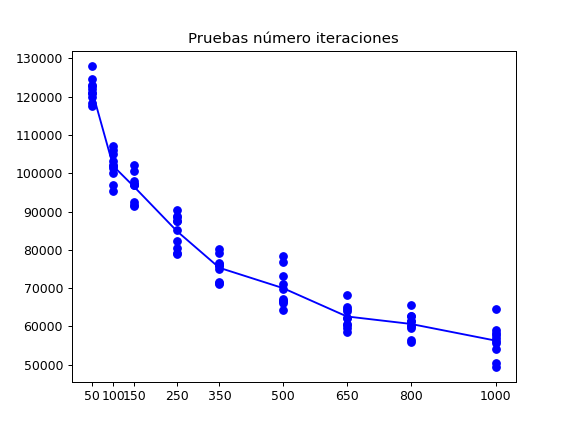

  0%|          | 0/9 [00:00<?, ?it/s]

ITERACIONES: 50


  0%|          | 0/10 [00:00<?, ?it/s]

ITERACIONES: 100


  0%|          | 0/10 [00:00<?, ?it/s]

ITERACIONES: 150


  0%|          | 0/10 [00:00<?, ?it/s]

ITERACIONES: 250


  0%|          | 0/10 [00:00<?, ?it/s]

ITERACIONES: 350


  0%|          | 0/10 [00:00<?, ?it/s]

ITERACIONES: 500


  0%|          | 0/10 [00:00<?, ?it/s]

ITERACIONES: 650


  0%|          | 0/10 [00:00<?, ?it/s]

ITERACIONES: 800


  0%|          | 0/10 [00:00<?, ?it/s]

ITERACIONES: 1000


  0%|          | 0/10 [00:00<?, ?it/s]

[[50, [122723.74647140608, 120980.60780772872, 120997.06362650734, 117549.84489884038, 118358.75076098915, 123173.3447548718, 128064.26662848488, 121893.32011287699, 119819.48760255775, 124521.319368889], [0.43883681297302246, 0.4183340072631836, 0.43510961532592773, 0.44702625274658203, 0.41551804542541504, 0.41921353340148926, 0.4463341236114502, 0.42905449867248535, 0.41817784309387207, 0.433607816696167]], [100, [101851.16026858933, 102215.95009971397, 107057.97022425954, 103119.63563968301, 105132.54432135912, 105963.27204738584, 97010.73620525915, 101416.34756122221, 100011.178790858, 95422.99882734535], [0.8369898796081543, 0.8568556308746338, 0.8194911479949951, 0.8169887065887451, 0.8220221996307373, 0.8330950736999512, 0.821552038192749, 0.8139297962188721, 0.8163108825683594, 0.8146443367004395]], [150, [97077.14508959073, 96799.85217497531, 92565.20788454388, 97254.67192463385, 97870.99264753975, 91597.86432499831, 96920.12168319963, 91494.9051134733, 100490.22225132147, 10

In [26]:

%matplotlib notebook

import matplotlib.pyplot as plt 
import statistics


NUMPRUEBAS=10


g2=Localizaciones(filename='./data/US120.txt')



iteraciones=[50,100,150,250,350,500,650,800,1000]
probabilidades.append(0.95)

#Creo figura y ejez
fig = plt.figure()
ax = fig.add_subplot(111, projection='rectilinear')
ax.set_title("Pruebas número iteraciones")
ax.set_xticks(iteraciones)

#Para guardar resultados y medias
resultados=[]
medias=[]

for it in tqdm(iteraciones):
    print("ITERACIONES:",it)
    #resultados y tiempos parciales
    rit=[]
    tit=[]
    for i in tqdm(range(NUMPRUEBAS)):
 
        inicio=time.time()
        rit.append(ejecucion_pruebas(g2,32,it,"i",0.6,"m"))
        final=time.time()
        tit.append(final-inicio)
    #almaceno resultados
    resultados.append([it,rit,tit])
    
for i in range(len(iteraciones)):
    #Imprimo puntos
    for j in range(NUMPRUEBAS):
        ax.plot(iteraciones[i],resultados[i][1][j], "bo")
    
    medias.append(statistics.mean(resultados[i][1]))
    
    print()
    print()
    #Impresion                    
    print("=====ITERACIONES ",iteraciones[i],"=====")
    print()
    print("MEDIAS:")
    print("Media coste:",statistics.mean(resultados[i][1]))
    print()
    
    print("DESVIACIÓN TÍPICA:")
    print("Desviación típica:",statistics.stdev(resultados[i][1]))
    print()
        
        
    print("TIEMPOS:")
    print("Media tiempo:",statistics.mean(resultados[i][2]))
    print()
        

print()
#Imprimo recta media
plt.plot(iteraciones,medias,color='blue')  
plt.show()

#### Resultados
La gráfica muestra los resultados esperados ante el incremento de iteraciones, y es que cuantas más iteraciones se le den al proceso evolutivo más se irán perfeccionando las soluciones gracias al mecanismo de selección tanto en la reproducción como en reemplazo. La mejora es muy abrupta al comienzo y se va estabilizando ligeramente.

En caso de buscar una solución de compromiso entre el coste y el tiempo dedicado, probablemente el mejor sea el 650. Esto se debe a que, comparándolo con el 500 se reduce el coste entorno a unos 7k con tan solo 1.3s más. Si se compara con 350, la reducción es de 13k con 3s más. Si se comparase con el siguiente, 800, la reducción de coste ya no es tan significativa (2k) y tiempo aumenta 1.3s. En consecuencia se selecciona el número de iteraciones 650 como solución de compromiso entre el coste y el tiempo, ya que las reducciones en el primero son menos notables a partir de este valor.

En cuanto a la discusión de los tres parámetros conjuntos, esta se ha ido realizando en cierta medida a lo largo de las diferentes preguntas, ya que se ha seguido un guión de pruebas en el que unas heredaban las deducciones de las anteriores. De esta forma se ha ido buscando una solución de compromiso entre tiempo y coste que cuente con el suficiente número de iteraciones para que el proceso evolutivo actúe considerablemente, que cuente con una variabilidad intermedia, ya que como se observó en el apartado de la mutación esta en grandes cantidades o pequeñas empeora los resultados y que cuente con un tamaño de población inicial que contribuya también a dotar de variabilidad a las siguientes generaciones sin incurrir en tiempos de ejecución excesivos. En resumen, la solución de compromiso encontrada contaría con una población inicial de 32 con el algoritmo de reemplazo mitades, una probabilidad de mutación individual de 0.6 y 850 iteraciones.

Una vez finalizada la discusión de compromiso, podría probarse que rendimiento tendría el algoritmo sin escatimar en costes temporales. Para ello se ejecutó este 10 veces con un tamaño de población inicial de 128, con 1000 iteraciones y conservando los algoritmos y la probabilidad de mutación de la solución de compromiso. Tras el código se analizan los resultados.

In [28]:
rit=[]
tit=[]
for i in tqdm(range(NUMPRUEBAS)):
    inicio=time.time()
    rit.append(ejecucion_pruebas(g2,128,1000,"i",0.6,"m"))
    final=time.time()
    tit.append(final-inicio)
print("MEDIA COSTE:",statistics.mean(rit))
print()
print("MEDIA TIEMPO:",statistics.mean(tit))

  0%|          | 0/10 [00:00<?, ?it/s]

MEDIA COSTE: 48669.952498778344

MEDIA TIEMPO: 36.38658077716828


Como se puede observar, la media de costes mejora considerablemente, sin embargo (y como es de esperar) el aumento de iteraciones y de población inicial incrementa el tiempo de ejecución, demorándose cada una 30s más que la solución de compromiso. Pese a la mejora en el coste, esta sigue siendo muy lejana a los 25k que se alcanzaban en la práctica anterior en la búsqueda tabú.

En conclusión, el algoritmo es útil y muy adaptable a las necesidades del problema, de forma que se puede ajustar la relación calidad de la solución-coste temporal a cada situación de aplicación ajustando los parámetros de este de forma relativamente sencilla.